In [24]:
from astropy import units as u
import numpy as np
from astropy import constants as const
import matplotlib.pyplot as plt

### Problem One

In [2]:
C_1 = ((6/7)**2)**(3/4) * (1-6/7)**(1/4)
C_2 = (6/7)**2

In [3]:
def T_char(m, del_m, R_star):
    T_c = ((3 * const.G * m * del_m) / (8 * np.pi * const.sigma_sb * R_star**3)) ** (1/4)
    return T_c.to(u.K)

In [4]:
def schwarz_radius(M):
    return 2 * const.G * M / const.c**2

In [5]:
def wiens_law(T):
    return const.b_wien / T

i. a neutron star with M˙ = 1.0 × 10−9 M_Sun yr−1, M ∼ 2 M_Sun and R ∼ 10 km

ii. a white dwarf near the Chandrasekhar limit with M˙ = 1.0 × 10−10 M_Sun yr−1 and R ∼ R⊕

iii. a 10 M_Sun black hole with M˙ = 1.0 × 10−8 M_Sun yr−1 and a 109 M_Sun black hole with M˙ = 10 M_Sun yr−1

iv. a protostar with M˙ = 1.0 × 10−4 M_Sun yr−1, R ∼ 5 R_Sun and M ∼ 0.5 M_Sun



In [6]:
## Neutron Star

M = 2 * u.M_sun
del_M = 1.0 * 10**(-9) * u.M_sun * u.year**(-1)
R = 10 * u.km

T_c = T_char(M, del_M, R)
T_max = C_1 * T_c
T_max

<Quantity 6682802.29971589 K>

In [7]:
lambda_max = wiens_law(T_max)
lambda_max.to(u.Angstrom)

<Quantity 4.33616292 Angstrom>

In [8]:
## White Dwarf near Chandrasekhar limit
M = 1.4 * u.M_sun
del_M = 1.0 * 10**(-9) * u.M_sun * u.year**(-1)
R = 1 * u.R_earth

T_c = T_char(M, del_M, R)
T_max = C_1 * T_c
T_max

<Quantity 48163.12195331 K>

In [9]:
lambda_max = wiens_law(T_max)
lambda_max.to(u.Angstrom)

<Quantity 601.65783231 Angstrom>

In [10]:
## 10 Solar Mass BH
M = 10 * u.M_sun
del_M = 1.0 * 10**(-8) * u.M_sun * u.year**(-1)
R = schwarz_radius(M).to(u.km)

T_c = T_char(M, del_M, R)
T_max = C_1 * T_c
T_max

<Quantity 7888164.27815807 K>

In [11]:
lambda_max = wiens_law(T_max)
lambda_max.to(u.Angstrom)

<Quantity 3.67356948 Angstrom>

In [12]:
## SMBH 
M = 10**9 * u.M_sun
del_M = 10 * u.M_sun * u.year**(-1)
R = schwarz_radius(M).to(u.km)

T_c = T_char(M, del_M, R)
T_max = C_1 * T_c
T_max

<Quantity 140273.60118853 K>

In [13]:
lambda_max = wiens_law(T_max)
lambda_max.to(u.Angstrom)

<Quantity 206.579993 Angstrom>

In [14]:
## Protostar
M = 0.5 * u.M_sun
del_M = 10**(-4) * u.M_sun * u.year**(-1)
R = 5 * u.R_sun

T_c = T_char(M, del_M, R)
T_max = C_1 * T_c
T_max

<Quantity 5866.77739272 K>

In [15]:
lambda_max = wiens_law(T_max)
lambda_max.to(u.Angstrom)

<Quantity 4939.29079154 Angstrom>

### Problem Three

In [194]:
def planck_func(lamb, T):
    return (2*const.h*const.c**2 / lamb.to(u.m)**5) * (np.exp((const.h*const.c) / (lamb * const.k_B * T)) - 1)**(-1)

def planck_freq(nu, T):
    return (2 * const.h * nu**3 / const.c**2 ) * (np.exp(const.h*nu/(const.k_B*T)) - 1)**(-1)

In [195]:
def temperature(r):
    return r**(-3./4.) * (1-r**(-1./2.))**(1./4.)

In [196]:
## White Dwarf near Chandrasekhar limit
M = 1.4 * u.M_sun
del_M = 1.0 * 10**(-9) * u.M_sun * u.year**(-1)
R_star = 1 * u.R_earth

# Radius = R / R_star

T_c = T_char(M, del_M, R_star)

R = np.logspace(0, 2, num=100)
temps = T_c * temperature(R)

In [203]:
spec_optical = planck_func(720 * u.nm, temps)
spec_UV = planck_func(110*u.nm, temps)

#(1000 * u.nm).to(u.Hz, equivalencies=u.spectral())

spec_optical_f = planck_freq((720 * u.nm).to(u.Hz, equivalencies=u.spectral()), temps)#.to(u.W * u.m**(-2) * u.Hz**(-1))
spec_optical_f.to(u.W * u.m**(-2) * u.Hz**(-1))
spec_UV_f = planck_freq((110*u.nm).to(u.Hz, equivalencies=u.spectral()), temps)
spec_UV_f.to(u.W * u.m**(-2) * u.Hz**(-1))
print()

In [198]:
def flux()

SyntaxError: invalid syntax (<ipython-input-198-5ed16cdcd9a5>, line 1)

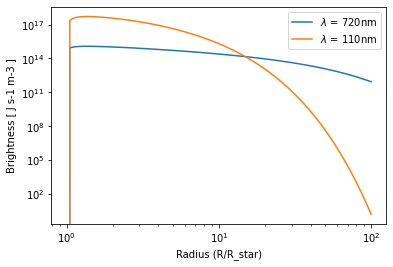

In [205]:
plt.plot(R, spec_optical, label='$\lambda$ = 720nm')
plt.plot(R, spec_UV, label='$\lambda$ = 110nm')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Radius (R/R_star)')
plt.ylabel('Brightness [ J s-1 m-3 ]')
plt.legend()